In [30]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.05 0.05 0.15]



( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.05 0.05 0.15]\n\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK__57_Arduino_27_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST_work experiment_centroid_links-tableLINKS.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       '( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)',
       '( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [32]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,1,1.5,1,10,0.05,0,2.7895,2.7500,0.0375,0.0000,0.4079,0.1000,0.0000,0.0000,22
1,6,1.5,1,20,0.15,0,2.4559,2.5833,0.0375,0.0000,0.1625,0.0000,0.0000,0.0000,8
2,8,1.5,1,30,0.05,0,2.3026,3.0000,0.0333,0.0000,0.2934,0.0625,0.0000,0.0000,16
3,3,1.5,1,10,0.15,0,2.7500,2.8333,0.0667,0.0000,0.2408,0.1000,0.0000,0.0000,17
4,4,1.5,1,20,0.05,0,2.5132,2.0000,0.0000,0.0000,0.3625,0.0375,0.0000,0.0000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,107,5.5,5,40,0.05,89,1.5395,7.2500,0.7491,1.6522,0.6137,25.7625,1.2862,-1.2847,1149
9824,108,5.5,5,40,0.15,88,1.7794,2.9167,0.7561,1.6392,0.6205,25.2500,-1.6130,-0.3766,1156
9825,107,5.5,5,40,0.05,90,1.9605,7.2500,0.7481,1.6513,0.6140,25.7250,1.5487,-0.9222,1152
9826,108,5.5,5,40,0.15,89,1.5147,4.0833,0.7572,1.6383,0.6208,25.2125,-1.5755,-0.3266,1159


In [33]:
df_move=df4.groupby(['percentage-unhappy','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7724          2.2315        0.2412  0.0000   
                   1           1.9747          1.5988        0.3108  0.6596   
                   2           2.4198          2.0525        0.3505  0.9858   
                   3           2.3537          1.9599        0.3683  0.8865   
                   4           2.4875          2.0432        0.3796  0.8115   
...                               ...             ...           ...     ...   
40                 86          1.8057          5.9506        0.5278  0.6657   
                   87          1.7099          6.8920        0.5302  0.6647   
                   88          1.7855          3.4877        0.5304  0.6627   
                   89          1.5513          5.9537        0.5303  0.6612   
                   90          1.9337          5.9660        0.5320  0.6593   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3351      69.8861      0.0000      0.0000   
                   1        0.3095      68.9630      0.2947      0.0118   
                   2        0.3131      72.0681      0.2454      0.0185   
                   3        0.3122      68.3829      0.2487      0.0301   
                   4        0.3208      63.4898      0.2229      0.0289   
...                            ...          ...         ...         ...   
40                 86       0.4456      44.8782     -0.4596     -0.2616   
                   87       0.4467      44.5574     -0.4207     -0.2593   
                   88       0.4483      44.3542     -0.4711     -0.2310   
                   89       0.4484      44.1537     -0.4637     -0.2338   
                   90       0.4492      44.1935     -0.4184     -0.2523   

                            links  
percentage-unhappy step            
10                 0      79.4444  
                   1     104.0370  
                   2     119.9630  
                   3     134.7778  
                   4     144.8519  
...                           ...  
40                 86    548.2222  
                   87    550.6296  
                   88    554.2963  
                   89    557.4444  
                   90    560.0370  

[364 rows x 9 columns]

In [34]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [35]:
df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7724          2.2315        0.2412  0.0000   
                   1           1.9747          1.5988        0.3108  0.6596   
                   2           2.4198          2.0525        0.3505  0.9858   
                   3           2.3537          1.9599        0.3683  0.8865   
                   4           2.4875          2.0432        0.3796  0.8115   
...                               ...             ...           ...     ...   
40                 86          1.8057          5.9506        0.5278  0.6657   
                   87          1.7099          6.8920        0.5302  0.6647   
                   88          1.7855          3.4877        0.5304  0.6627   
                   89          1.5513          5.9537        0.5303  0.6612   
                   90          1.9337          5.9660        0.5320  0.6593   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3351      69.8861      0.0000      0.0000   
                   1        0.3095      68.9630      0.2947      0.0118   
                   2        0.3131      72.0681      0.2454      0.0185   
                   3        0.3122      68.3829      0.2487      0.0301   
                   4        0.3208      63.4898      0.2229      0.0289   
...                            ...          ...         ...         ...   
40                 86       0.4456      44.8782     -0.4596     -0.2616   
                   87       0.4467      44.5574     -0.4207     -0.2593   
                   88       0.4483      44.3542     -0.4711     -0.2310   
                   89       0.4484      44.1537     -0.4637     -0.2338   
                   90       0.4492      44.1935     -0.4184     -0.2523   

                            links  total_mood  
percentage-unhappy step                        
10                 0      79.4444      5.0039  
                   1     104.0370      3.5735  
                   2     119.9630      4.4723  
                   3     134.7778      4.3135  
                   4     144.8519      4.5307  
...                           ...         ...  
40                 86    548.2222      7.7563  
                   87    550.6296      8.6019  
                   88    554.2963      5.2731  
                   89    557.4444      7.5050  
                   90    560.0370      7.8998  

[364 rows x 10 columns]

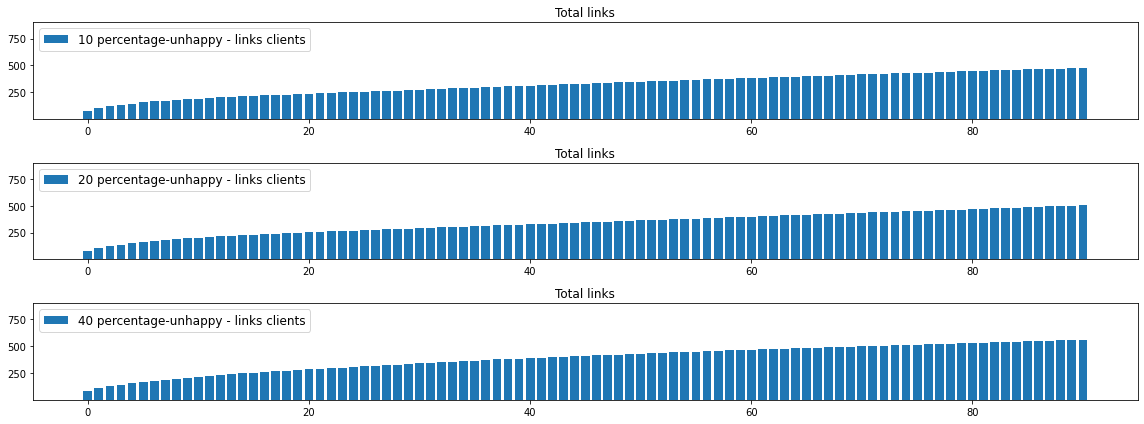

In [36]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['links'], label='{} percentage-unhappy - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

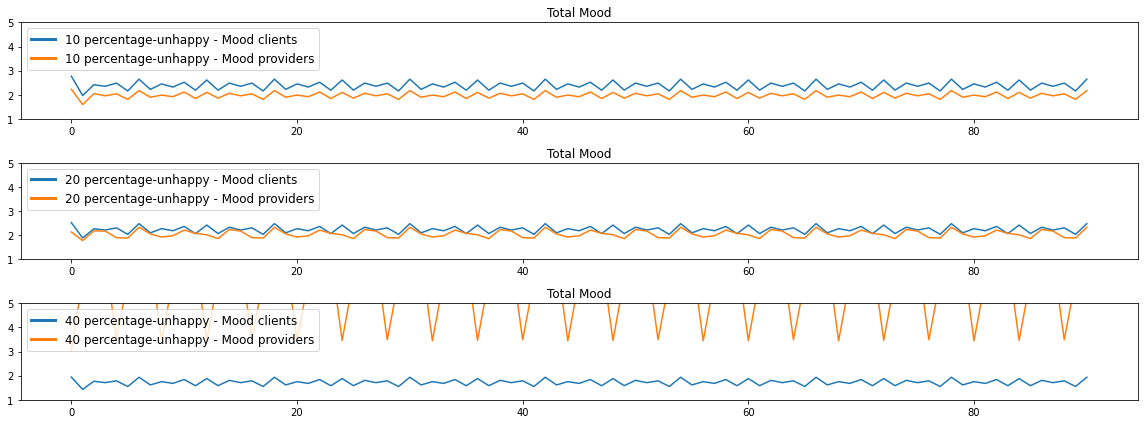

In [37]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_clients'], label='{} percentage-unhappy - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_providers'], label='{} percentage-unhappy - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



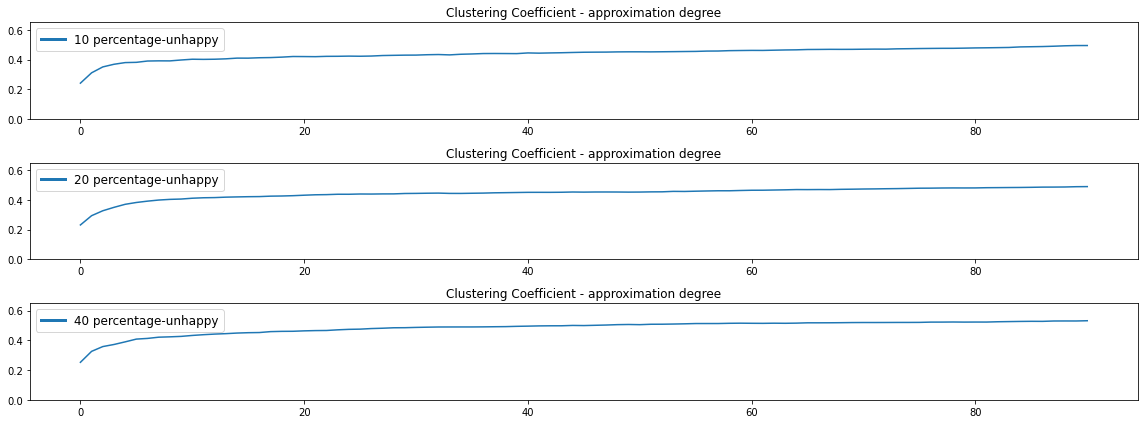

In [38]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['cluster_coef'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



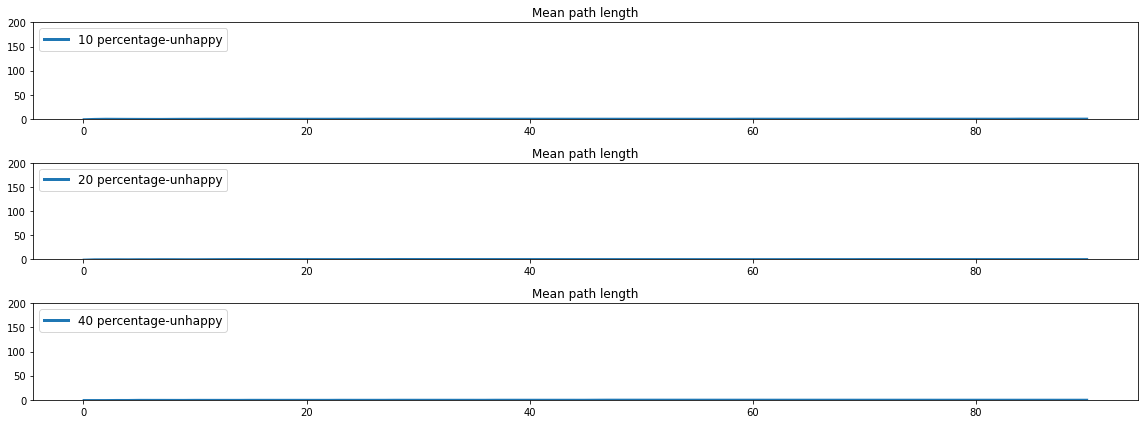

In [39]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['paths'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



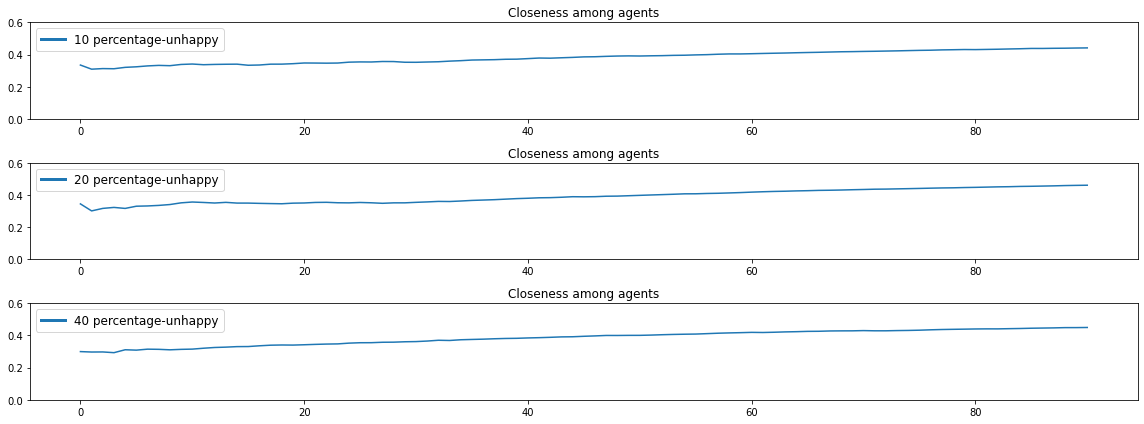

In [40]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['closeness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



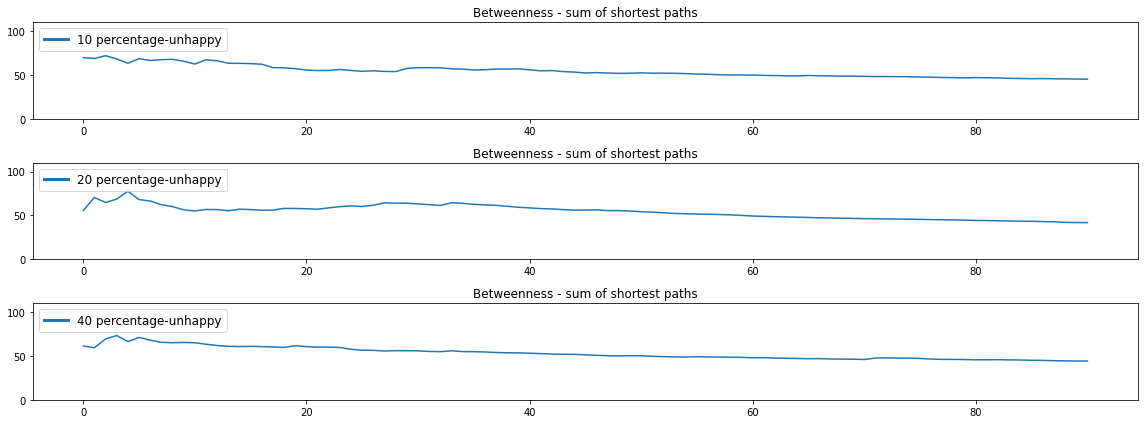

In [41]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['betweenness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [42]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==5].mean()

In [43]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [44]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,29.4651,0.0
1,mood_providers,-26.2505,0.0
2,cluster_coef,-7.0091,0.0
3,paths,19.6524,0.0
4,closeness,-0.5123,0.6091
5,betweenness,1.2135,0.2265
6,centroid-x,24.2186,0.0
7,centroid-y,23.1276,0.0
8,links,-3.9318,0.0001
9,total_mood,-21.7805,0.0


In [45]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,868.19,0.0
1,mood_providers,689.0886,0.0
2,cluster_coef,49.1273,0.0
3,paths,386.2183,0.0
4,closeness,0.2624,0.6091
5,betweenness,1.4727,0.2265
6,centroid-x,586.5424,0.0
7,centroid-y,534.8875,0.0
8,links,15.4589,0.0001
9,total_mood,474.3885,0.0


In [48]:
df_move.reset_index().columns

Index(['percentage-unhappy', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness', 'centroid-x',
       'centroid-y', 'links', 'total_mood'],
      dtype='object')

In [49]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients     -0.5969
mood_providers   -0.5968
cluster_coef      0.7640
paths             0.5095
closeness         0.9512
betweenness       0.8656
total_mood       -0.6042
centroid-x       -0.7796
centroid-y       -0.7334
dtype: float64

In [ ]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6624
mood_providers   -0.4342
cluster_coef      0.7970
paths             0.8036
closeness         0.7845
betweenness      -0.6125
total_mood       -0.3487
centroid-x       -0.0714
centroid-y       -0.2436
dtype: float64

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1.5].iloc[0:30,2:].shape

(0, 9)

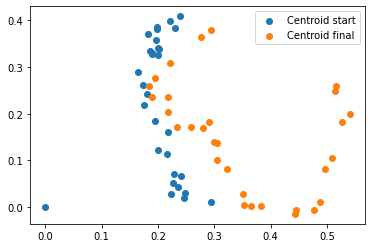

In [50]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

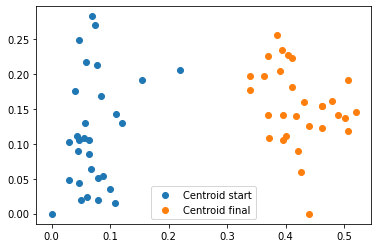

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [ ]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7704          2.2840        0.2378  0.0000   
                   1           1.9757          1.6265        0.2971  0.6716   
                   2           2.4731          2.0648        0.3359  0.7860   
                   3           2.3411          1.9506        0.3533  1.1591   
                   4           2.5258          2.0031        0.3705  1.0234   
...                               ...             ...           ...     ...   
40                 86          1.7520          5.6451        0.5249  0.8497   
                   87          1.6268          6.7562        0.5248  0.8475   
                   88          1.7209          3.4599        0.5253  0.8456   
                   89          1.5007          5.5463        0.5255  0.8421   
                   90          1.8555          5.7222        0.5282  0.8407   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3294      59.2968      0.0000      0.0000   
                   1        0.3036      62.6704      0.2834      0.1461   
                   2        0.3262      67.8995      0.3067      0.1359   
                   3        0.3124      71.6153      0.3122      0.1128   
                   4        0.3177      67.9060      0.3484      0.0983   
...                            ...          ...         ...         ...   
40                 86       0.4279      49.0245      0.4108      0.1820   
                   87       0.4308      48.1565      0.3951      0.1422   
                   88       0.4321      47.8097      0.4220      0.0904   
                   89       0.4329      47.8176      0.4257      0.0593   
                   90       0.4346      47.5741      0.4395     -0.0004   

                         total_mood  
percentage-unhappy step              
10                 0         5.0543  
                   1         3.6022  
                   2         4.5379  
                   3         4.2917  
                   4         4.5289  
...                             ...  
40                 86        7.3971  
                   87        8.3830  
                   88        5.1808  
                   89        7.0470  
                   90        7.5777  

[364 rows x 9 columns]

/tmp/ipykernel_271039/741047512.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


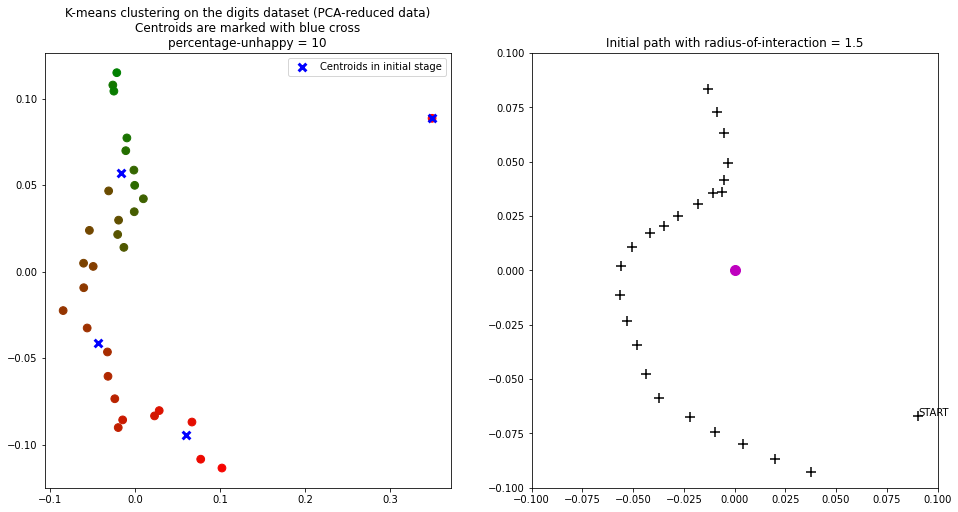

In [ ]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].shape

(0, 11)

/tmp/ipykernel_271039/3037804788.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


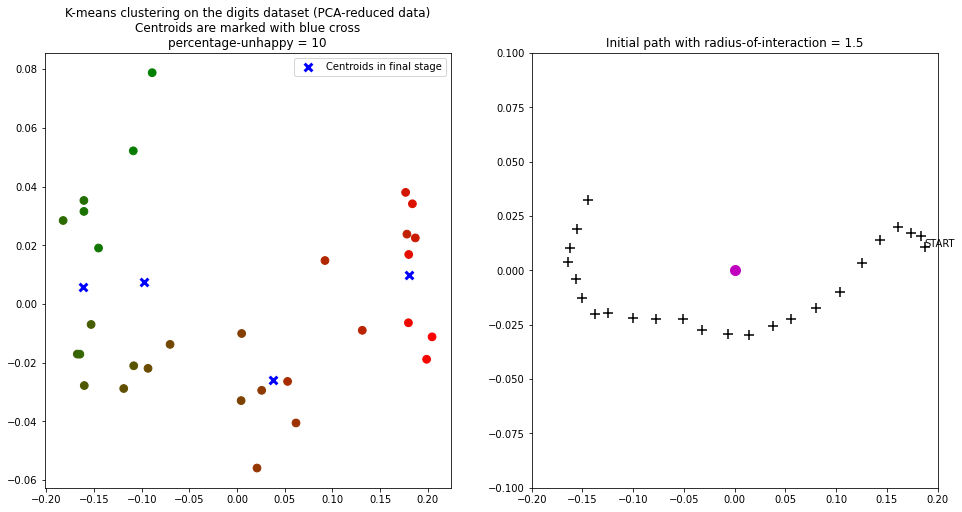

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_271039/1423708788.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


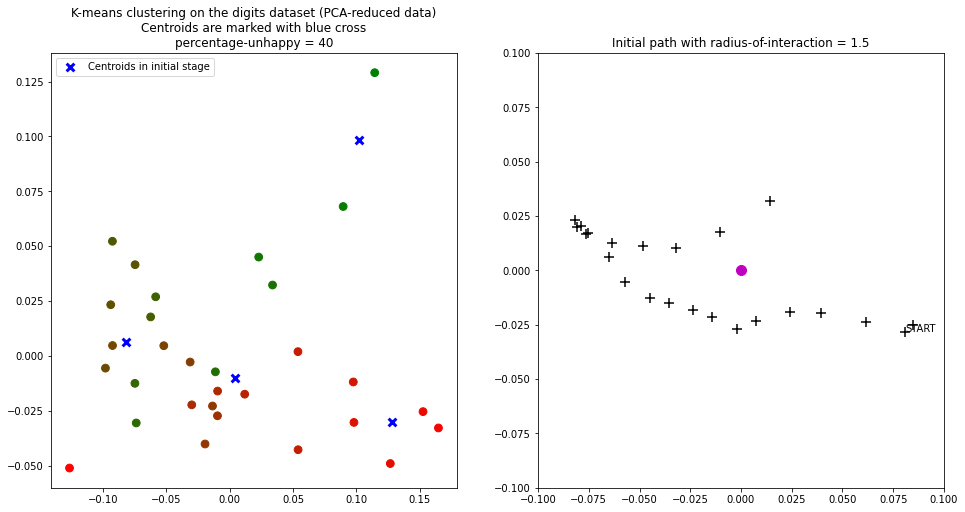

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_271039/2837785209.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


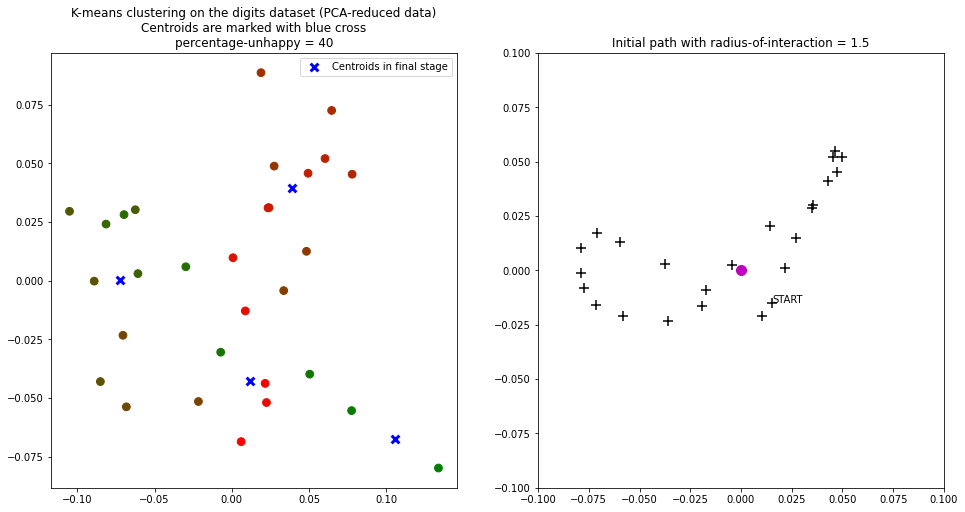

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()